In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
sr = pd.read_csv("final-fix.csv")
sr

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Argentina,2006,male,75+ years,246,620010,39.68,233000000000,6475,Silent
1,1,Argentina,2006,male,15-24 years,656,3357424,19.54,233000000000,6475,Millenials
2,2,Argentina,2006,male,55-74 years,487,2540712,19.17,233000000000,6475,Silent
3,3,Argentina,2006,male,25-34 years,483,3068991,15.74,233000000000,6475,Generation X
4,4,Argentina,2006,male,35-54 years,585,4383730,13.34,233000000000,6475,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
6439,6439,Uruguay,2015,female,25-34 years,23,232133,9.91,53274304222,16696,Millenials
6440,6440,Uruguay,2015,female,35-54 years,38,440475,8.63,53274304222,16696,Generation X
6441,6441,Uruguay,2015,female,15-24 years,17,255067,6.66,53274304222,16696,Millenials
6442,6442,Uruguay,2015,male,5-14 years,3,252509,1.19,53274304222,16696,Generation Z


In [ ]:
sr_country = sr.groupby(by='year', as_index=False).agg(total_suicide=('suicides_no', sum))
sr_country.sort_values(by='year', ascending=True, inplace=True)
sr_country

,year,total_suicide
0,2006,209579
1,2007,210108
2,2008,210967
3,2009,215996
4,2010,210769
5,2011,209630
6,2012,207298
7,2013,198231
8,2014,203388
9,2015,201419


In [ ]:
x = sr_country['year'].values.reshape(-1,1)
y = sr_country['total_suicide'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)


[[-1287.80039139]]
[2796840.46183953]


In [ ]:
lin_reg.score(x_test, y_test)

0.9988719202730506

Text(0.5, 1.0, 'Year vs Suicides Number')

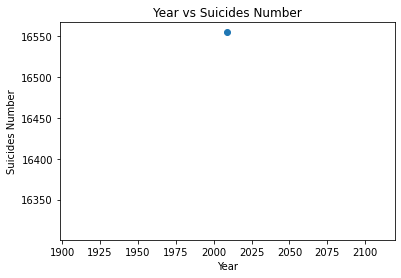

In [ ]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.title('Year vs Suicides Number')

(180000.0, 221730.4045668153)

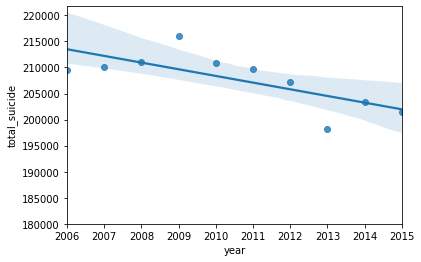

In [ ]:
import seaborn as sns

sns.regplot(x='year',y='total_suicide', data=sr_country)
plt.ylim(180000,)

In [ ]:
import numpy as np
np.round(lin_reg.predict([[2016]]))

array([[200635.]])

In [ ]:
np.round(lin_reg.predict([[2018]]))

array([[198059.]])

In [ ]:
np.round(lin_reg.predict([[2020]]))

array([[195484.]])